Rows & columns in your data file are :  (400, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
Datatypes for each columns, describe my data : 
 None


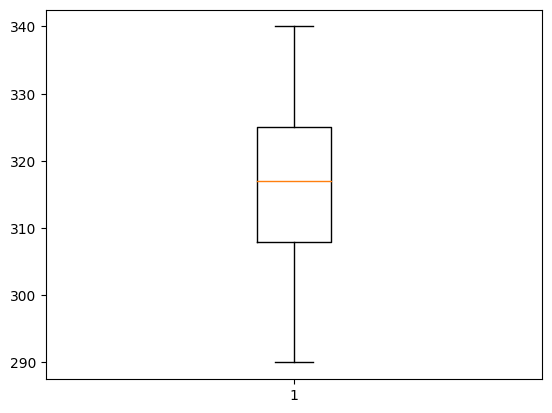

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Correlation in a tabular format : 
                    GRE Score  TOEFL Score  ...  Research  Chance of Admit 
GRE Score           1.000000     0.835977  ...  0.580391          0.802610
TOEFL Score         0.835977     1.000000  ...  0.489858          0.791594
University Rating   0.668976     0.695590  ...  0.447783          0.711250
SOP                 0.612831     0.657981  ...  0.444029          0.675732
LOR                 0.557555     0.567721  ...  0.396859          0.669889
CGPA                0.833060     0.828417  ...  0.521654          0.873289
Research            0.580391     0.489858  ...  1.000000          0.553202
Chance of Admit     0.802610     0.791594  ...  0.553202          1.000000

[8 rows x 8 columns]


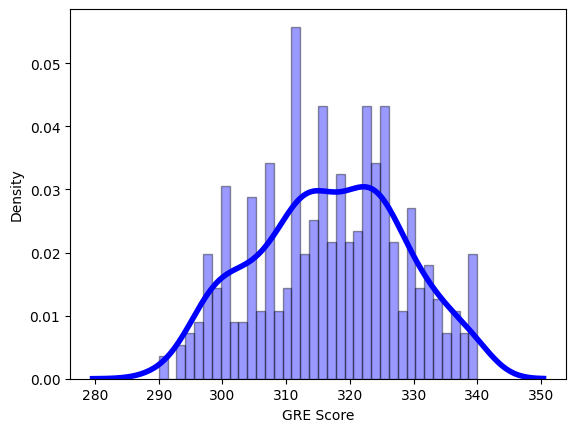

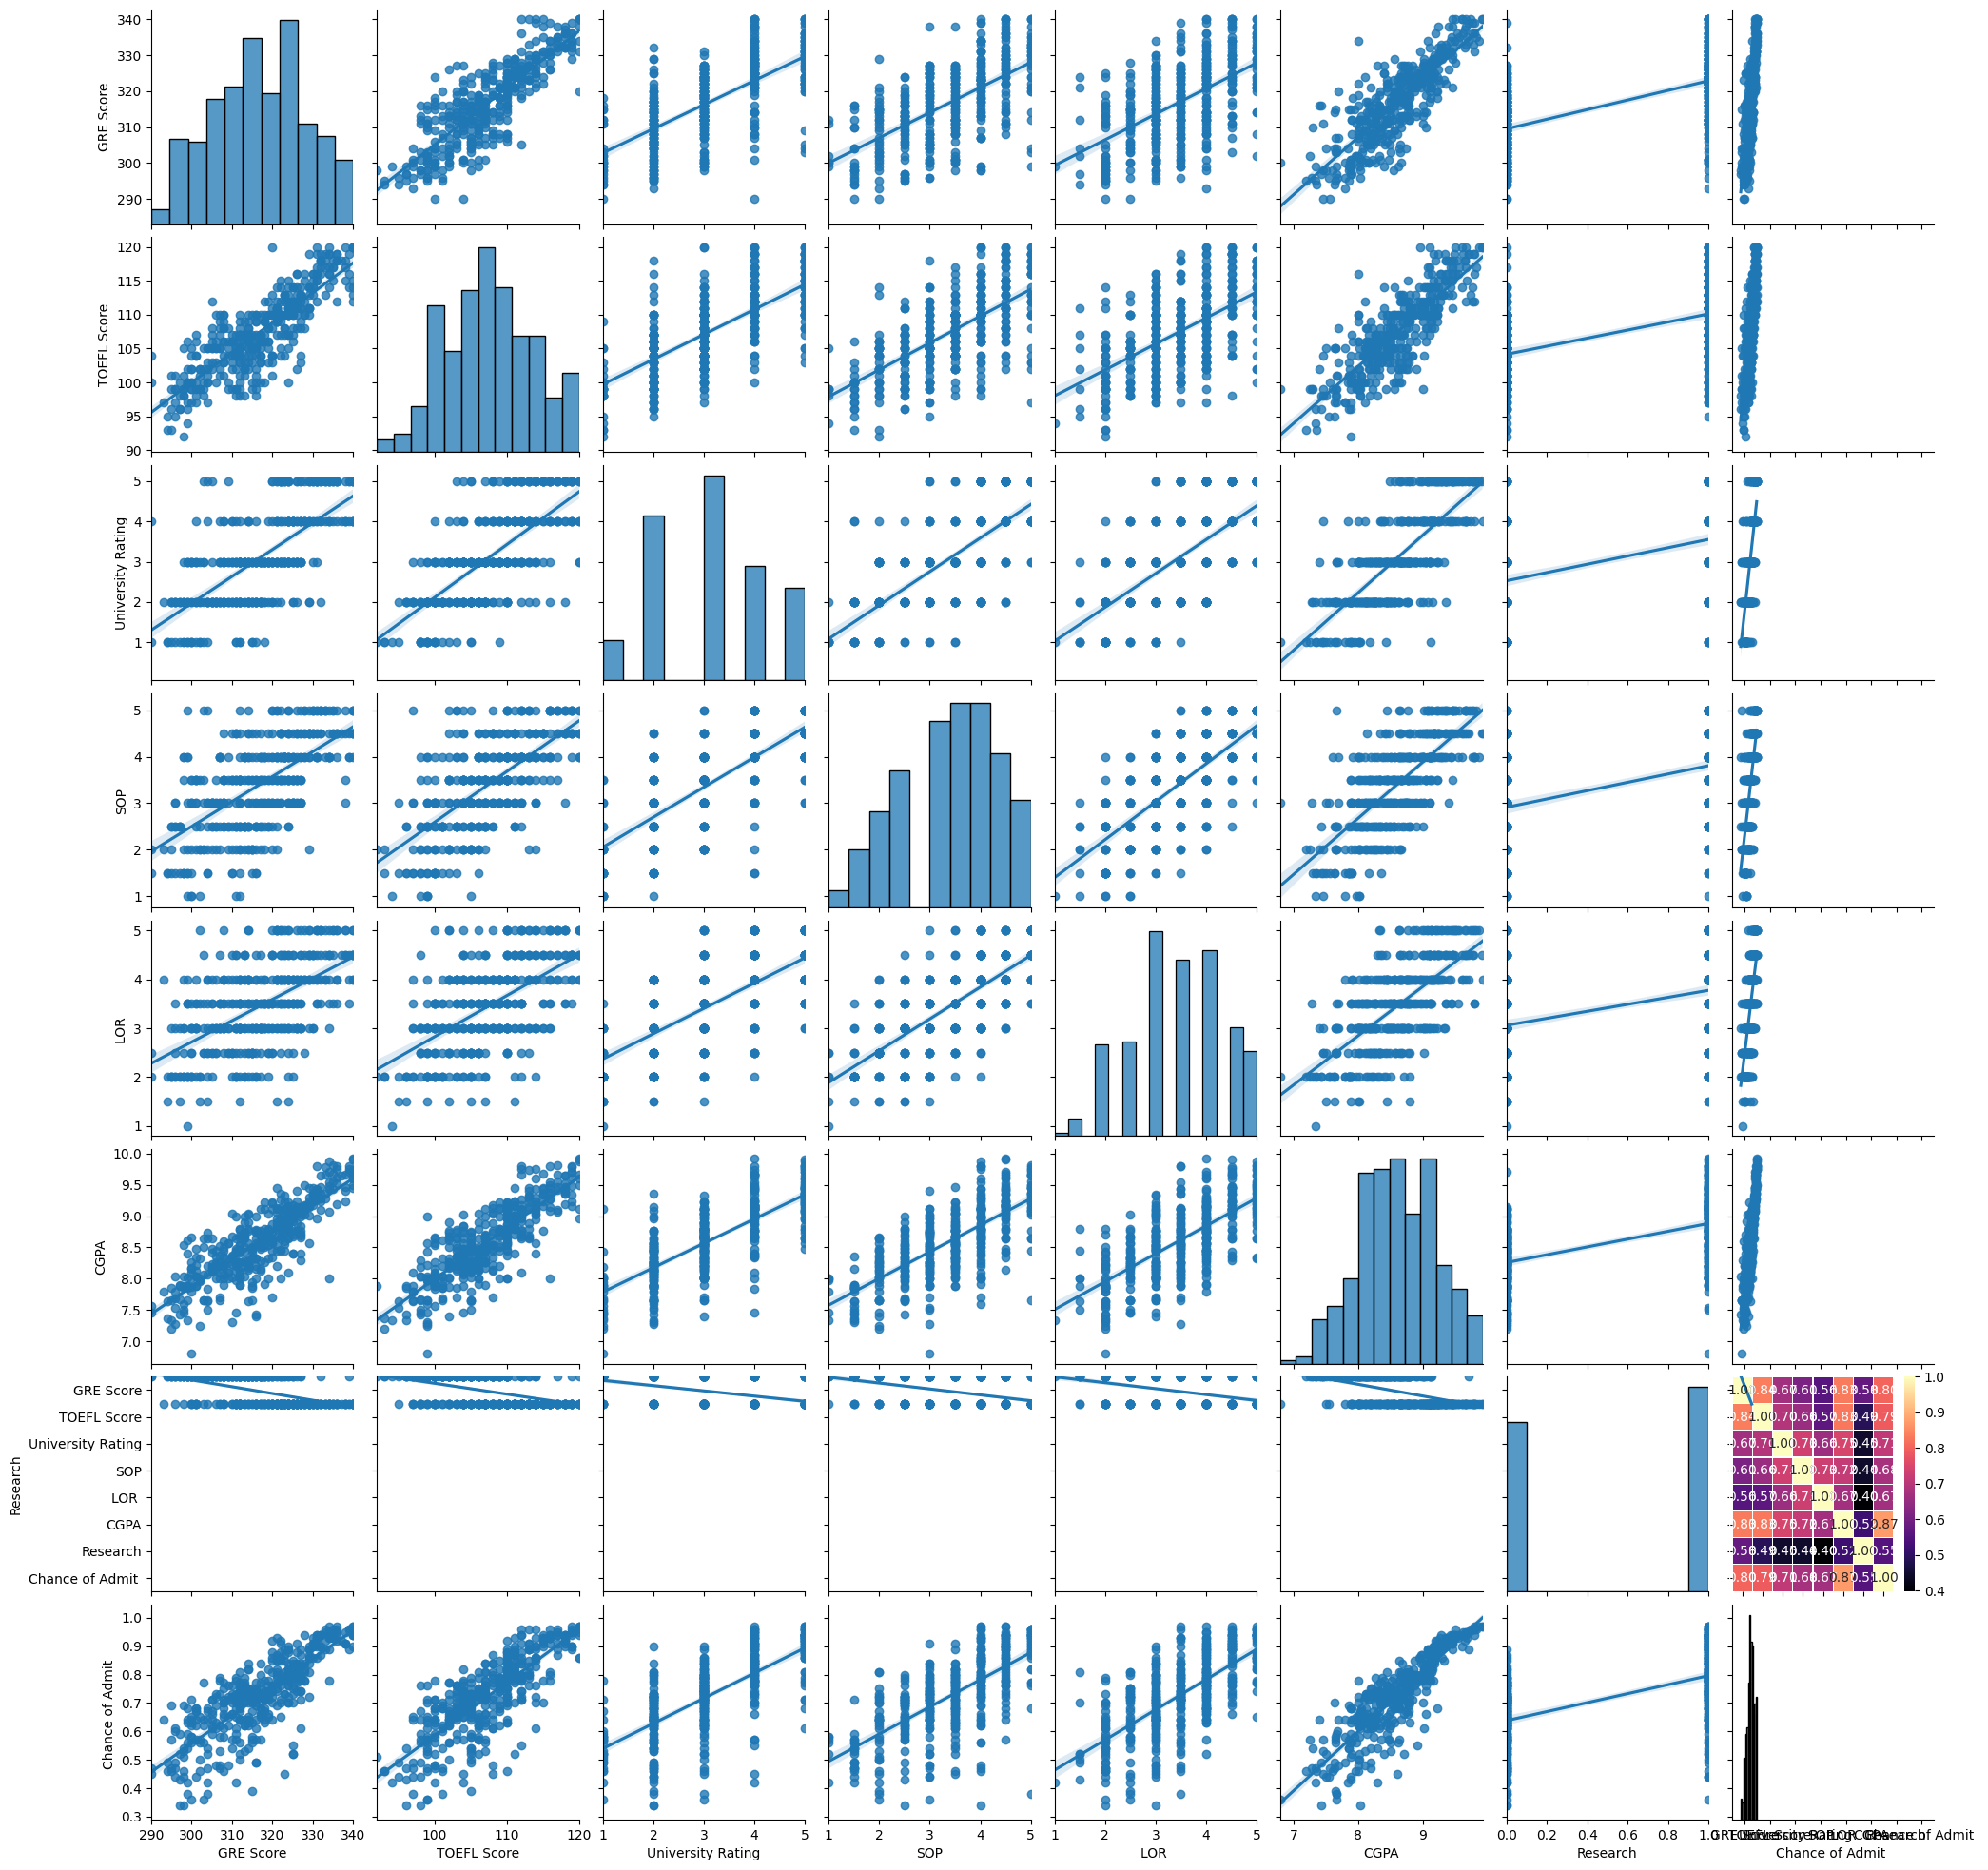

In [44]:
#Importing the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Reading the csv file. File needs to be in same folder where the python code is present, otherwise add the folder path with the file name
df = pd.read_csv('Admission_Predict.csv')

#Getting to know your data
print('Rows & columns in your data file are : ', df.shape)

#Understanding the datatypes of each columns in the data file
print('Datatypes for each columns, describe my data : \n',df.info())

# Remove the columns which are of no use for our analysis
df.drop('Serial No.',axis=1,inplace=True)

# Plotting a measure value, to understand the distribution and the data skewness.This also helps to eliminate the outliers
plt.boxplot(df['GRE Score'])
plt.show()
plt.close()
#Distribution of data skewness. This also helps to eliminate the outliers 
sns.distplot(df['GRE Score'], hist=True, kde=True,bins=int(180/5), color = 'blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

#Descibing the corelation of the data. Linear relationship b/w various variable(Columns)
sns.pairplot(df,kind='reg')
#Conclusions
# a. As per the plots, we see there is GRE Socres, CGPA, TOFEL are highly corelated with the chance of admission
# b. Straight lines in the plots shows a linear relationship b/w the variables and the target

#Calculating the correlation factor. +ve correlation factor denotes a directly propotional based on the factor. Negative value denotes the inversely proportional factor
# Regression equation, y = a + b1x1 + b2x2....bnxn - Here a, b are the co-efficent factors, which defines the relationship 
print('Correlation in a tabular format : \n',df.corr(method='pearson'))

#Correlation in a heatmap visual format
# Light color represents higher correlation and the darker color reprsent lower linearnity 

sns.heatmap(df.corr(),annot=True,linewidths=0.05,fmt='0.2f',cmap='magma')
#plt.show()
